In [1]:
#libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt     

In [2]:
#loading the dataset 


train_data = pd.read_csv("train.csv")
train_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
train_data.shape

(159256, 24)

In [5]:
train_data.isna().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

AS we can see that there's no "null" values. Now in the next cell doing a quick check about irregular values too

Usually the values like -9999 or -999 or '-' or blank spaces can be considered 'irregular'

In [6]:
irregular_values = ['?', ' ', '', -999, -9999, '-']
for irregular_value in irregular_values:
  print(f"Value count for null type '{irregular_value}' is: ", (train_data == irregular_value).sum().sum())

Value count for null type '?' is:  0
Value count for null type ' ' is:  0
Value count for null type '' is:  0
Value count for null type '-999' is:  0
Value count for null type '-9999' is:  0
Value count for null type '-' is:  0


Data is all clean for this

In [15]:
#looking at descriptive statistics now.

train_data.describe().T # HERE .T is for Transpose, cause i found it easier to look the the columns as 'rows' 

,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


In [ ]:
train_data["smoking"].unique() #clearly this is our target variable. and the only values are either 1 and 0. 1 for preferebly smoker and 0 for non smoker 

array([1, 0])

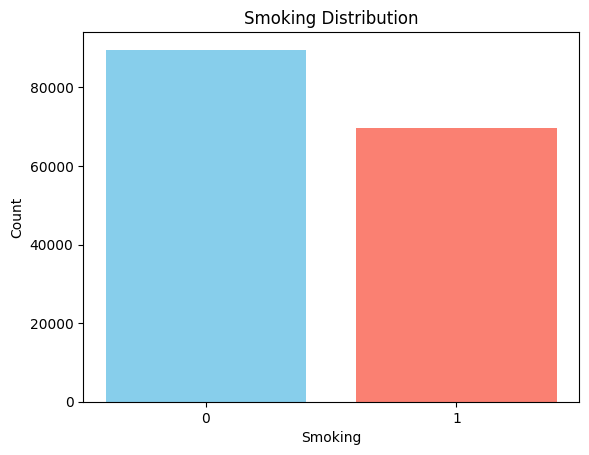

In [22]:
smoke_counts = train_data["smoking"].value_counts()
plt.bar(smoke_counts.index.astype(str), smoke_counts.values, color=["skyblue", "salmon"])
plt.title("Smoking Distribution")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.show()

#the non smoker are more than smoker, so maybe we need to divide the data more carefully.

Trying to select features now, based on basic visualization


for example age can 

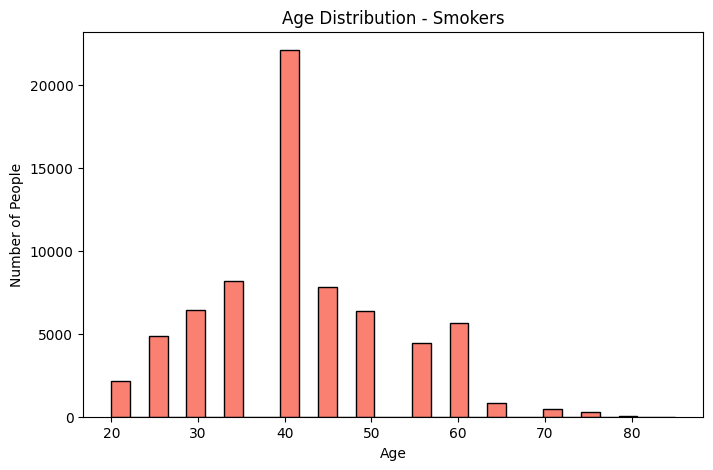

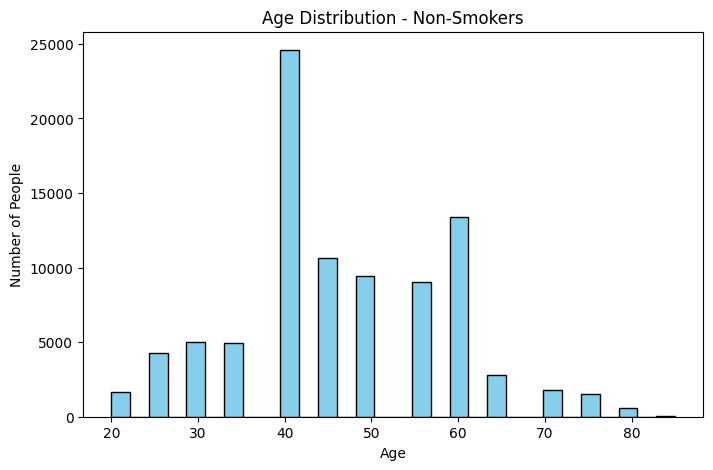

In [32]:
smoker_ages = train_data[train_data["smoking"] == 1]["age"]
non_smoker_ages = train_data[train_data["smoking"] == 0]["age"]

plt.figure(figsize=(8,5))
plt.hist(smoker_ages, bins=30, color="salmon", edgecolor="black")
plt.title("Age Distribution - Smokers")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()

plt.figure(figsize=(8,5))
plt.hist(non_smoker_ages, bins=30, color="skyblue", edgecolor="black")
plt.title("Age Distribution - Non-Smokers")
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.show()


C:\Users\soumy\AppData\Local\Temp\ipykernel_12496\411247740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["0 (non-smoker)", "1 (smoker)"])


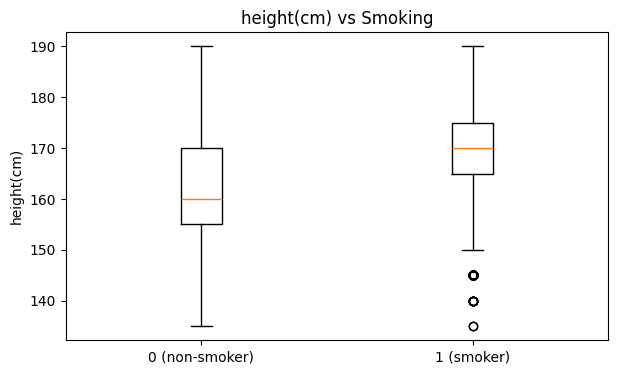

C:\Users\soumy\AppData\Local\Temp\ipykernel_12496\411247740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["0 (non-smoker)", "1 (smoker)"])


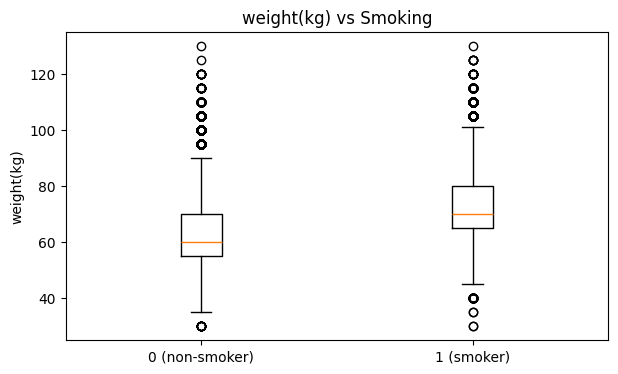

C:\Users\soumy\AppData\Local\Temp\ipykernel_12496\411247740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["0 (non-smoker)", "1 (smoker)"])


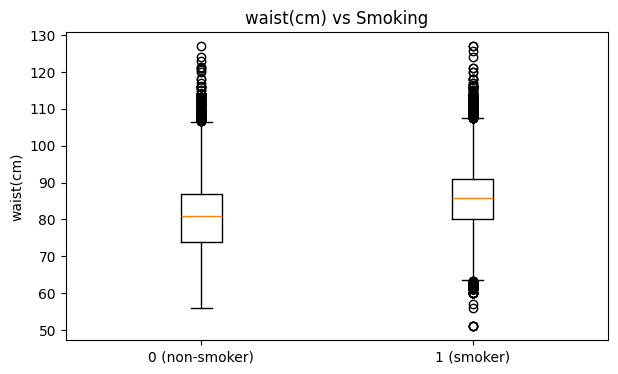

C:\Users\soumy\AppData\Local\Temp\ipykernel_12496\411247740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["0 (non-smoker)", "1 (smoker)"])


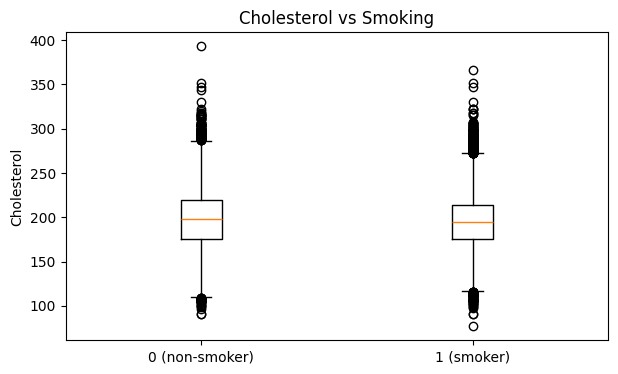

C:\Users\soumy\AppData\Local\Temp\ipykernel_12496\411247740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["0 (non-smoker)", "1 (smoker)"])


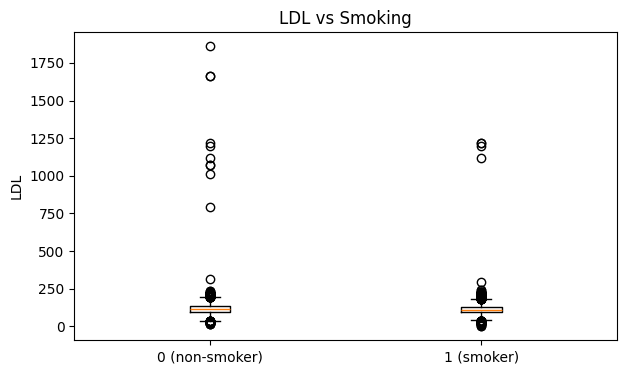

In [20]:
for col in ["height(cm)", "weight(kg)", "waist(cm)", "Cholesterol", "LDL"]:
    data = [train_data[train_data["smoking"]==0][col].dropna(),
            train_data[train_data["smoking"]==1][col].dropna()]
    plt.figure(figsize=(7,4))
    plt.boxplot(data, labels=["0 (non-smoker)", "1 (smoker)"])
    plt.title(f"{col} vs Smoking")
    plt.ylabel(col)
    plt.show()


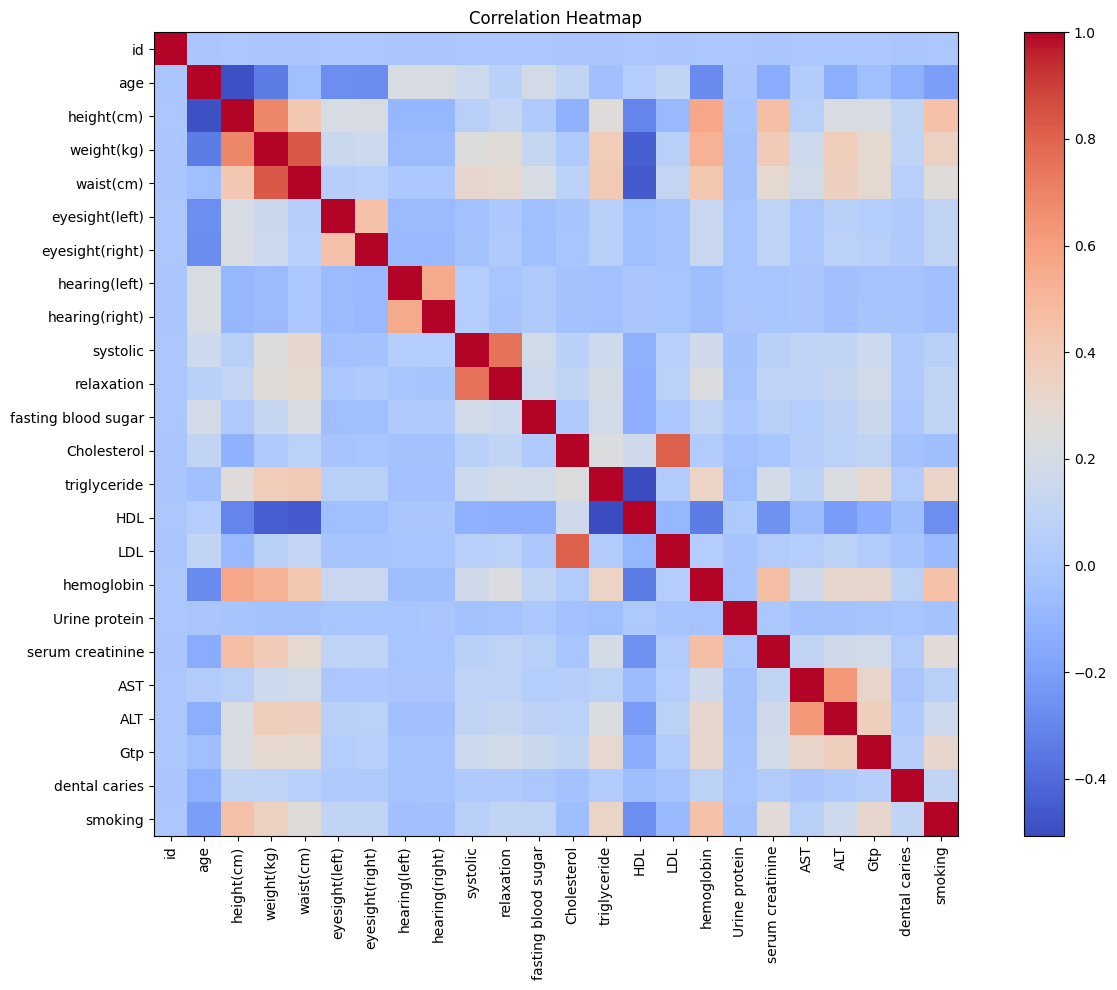

In [21]:
numeric_cols = train_data.select_dtypes(include=[np.number]).columns
corr = train_data[numeric_cols].corr()

plt.figure(figsize=(14,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

The possible features that can be selected are: weight, waist, triglyceride, hemogloibin, serum creatinine, gtp
i have left out height for now because although it shows more correlation because i feel that judging a person smoking status by height will produce wrong results.
since maybe men have higher smoking rate than women and an average man is taller than an average women. 

Also heatmap only shows us statistical relationship.

<Figure size 700x400 with 0 Axes>

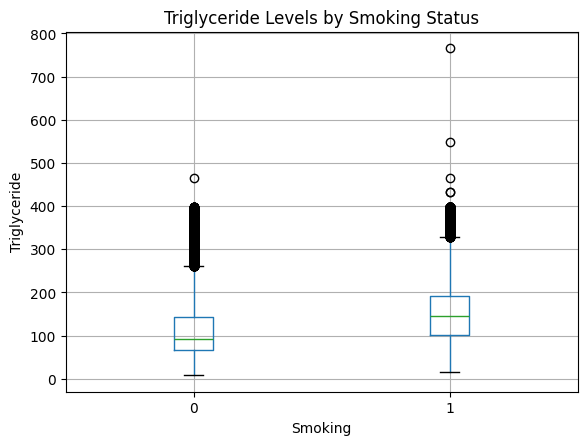

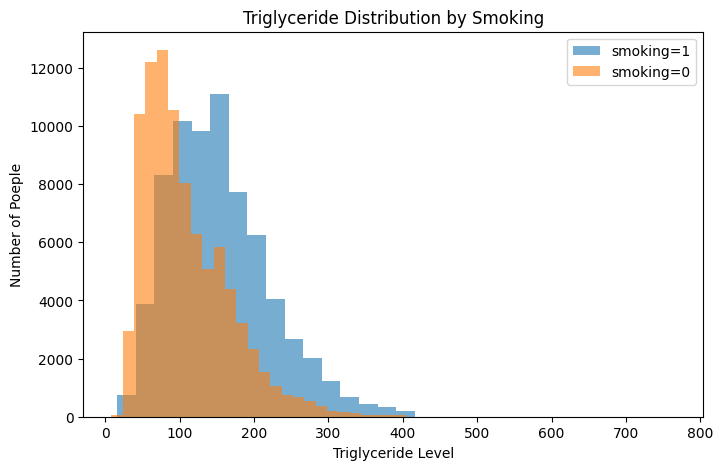

In [35]:
#taking a feature: triglyceride and comparing that with smoking status
plt.figure(figsize=(7,4))
train_data.boxplot(column="triglyceride", by="smoking")
plt.title("Triglyceride Levels by Smoking Status")
plt.suptitle("")
plt.xlabel("Smoking")
plt.ylabel("Triglyceride")
plt.show()


plt.figure(figsize=(8,5))
for label in train_data["smoking"].unique():
    subset = train_data[train_data["smoking"] == label]
    plt.hist(subset["triglyceride"], bins=30, alpha=0.6, label=f"smoking={label}")
plt.title("Triglyceride Distribution by Smoking")
plt.xlabel("Triglyceride Level")
plt.ylabel("Number of Poeple")
plt.legend()
plt.show()